<h1><center>Analise Dados IGM CFA 2017</center></h1>

O IGM é um indicador criado pelo Conselho Federal de Administração para pontuar os municípios em relação a diversos itens, como dados demográficos de cada município (população, tamanho etcs) , nos dados financeiros (PIB etcs) e nos dados de violência (mortalidade etcs).

Utilizando os dados fornecidos pelo Conselho Federal de Administracao analisaremos o IGM(Índice de Governança dos Municípios) de cada municipio em diversos ambitos, afim de apontar algum padrao e relacao entre diversos municipios.

### Dados
O site do CFA tem diversas informações sobre o [IGM](http://www.igm.cfa.org.br/) e também o [arquivo Excel para download](http://www.igm.cfa.org.br/downloads), o qual sera usado para esta analise.

O arquivo excel tem quatro planilhas, com os respectivos nomes, Ranking, Fiscal, Gestão e Desempenho.

**arquivo**  -> dados_IGM-CFA_2017.xlsx
***

*Dentro de cada celula está o comentario de passo a passo do que esta sendo feito com o codigo*

In [1]:
# Importando bibliotecas...
import pandas as pd
import matplotlib.pyplot as plt

# Mudando o estilo do matplotlib
plt.style.use('ggplot')

# Dizendo para o matplotlib plotar os graficos no notebook
%matplotlib inline

In [2]:
# Carregando DataFrames
df_Ranking = pd.read_excel('dados_IGM-CFA_2017.xlsx', sheet_name='Ranking', skiprows=1)
df_Fiscal = pd.read_excel('dados_IGM-CFA_2017.xlsx', sheet_name='Fiscal', skiprows=1)
df_Gestao = pd.read_excel('dados_IGM-CFA_2017.xlsx', sheet_name='Gestão', skiprows=1)
df_Desempenho = pd.read_excel('dados_IGM-CFA_2017.xlsx', sheet_name='Desempenho', skiprows=1)

In [3]:
# Mudando o valor padrao de colunas mostradas para 100, assim todas colunas estarao visiveis no notebook
pd.set_option('display.max_columns', 100)

In [4]:
# Monstrando duas primeiras linhas do DataFrame Ranking
df_Ranking.head(2)

,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE Cidades),Densidade demográfica 2010 (hab/km²) (IBGE Cidades),PIB 2013 - a preços correntes (1000 R$) (IBGE),PIB 2013 - a preços correntes per capita (IBGE),Gastos per capita (índice),IFGF (índice),Índice Fiscal 2017,Ranking sem outliers,Municípios com índice (1=Sim; 0 Não),Status em Fiscal,Variável do outlier,Terceirização - 2017,Informatização - 2017,Articulação Institucional -,Planejamento Urbano -,Servidores - 2017,Comissionados - 2017,Transparência - 2017,Índice Gestão - 2017,Ranking sem outlier,Municípios com índice (1=Sim; 0 Não).1,Status em Qualidade da Gestão,Variável do outlier.1,Educação - Prova Brasil - 2017,Violência - 2017,Qualidade habitacional - 2017,Vulnerabilidade - 2017,Atendimento Médico - 2017,Educação - 2017,Mortalidade Infantil - 2017,IDHM - 2017,Índice Desempenho - 2017,Ranking sem outlier.1,Outlier,Status,Municípios com índice (1=Sim; 0 Não).2,IGM - 2017,Ranking sem outlier.2,Ranking Estadual,Municípios com índice (1=Sim; 0 Não) (com Prova Brasil e Violência)
0,2106672,21,6672,MA,MILAGRES DO MARANHAO,0,Pequeno porte 1,8306,634.73,12.8,36729.786,4459.1217,0.358112,0.349956,0.354034,3324.0,1,Com dados,NaN,NaN,NaN,0.0,0.0,0.637965,0.995077,0.082393,NaN,NaN,0,Sem dados,NaN,0.000242,0.931735,0.199471,0.417617,NaN,0.646759,0.506638,0.200477,NaN,NaN,NaN,Sem dados,0,NaN,NaN,NaN,0
1,2102150,21,2150,MA,BREJO DE AREIA,0,Pequeno porte 1,10444,986.04,15.4,44176.635,9622.4428,0.406470,0.383476,0.394973,2659.0,1,Com dados,NaN,0.728583,NaN,0.0,0.0,NaN,NaN,0.172143,NaN,NaN,0,Sem dados,NaN,0.074632,NaN,0.184520,0.514810,NaN,0.528426,0.002709,0.181384,NaN,NaN,NaN,Sem dados,0,NaN,NaN,NaN,0


In [5]:
# Tamanho das tabelas, respectivamente o numero de linhas e colunas
print('Ranking:   ', df_Ranking.shape)
print('Fiscal:    ', df_Fiscal.shape)
print('Gestao:    ', df_Gestao.shape)
print('Desempenho:', df_Desempenho.shape)

Ranking:    (5570, 48)
Fiscal:     (5570, 30)
Gestao:     (5570, 78)
Desempenho: (5570, 85)


In [6]:
# Vendo o nome de todas as colunas e o numero de linhas respectivos, para 'df_Ranking'
df_Ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 48 columns):
Cód Mun                                                                 5570 non-null int64
Codigouf                                                                5570 non-null int64
Codigomunicipio                                                         5570 non-null int64
Estado                                                                  5570 non-null object
Nome                                                                    5570 non-null object
Capital (1=Sim;0=Não)                                                   5570 non-null int64
Porte do Município                                                      5570 non-null object
População 2016 (IBGE)                                                   5570 non-null int64
Área da unidade territorial 2015 (km²) (IBGE Cidades)                   5570 non-null float64
Densidade demográfica 2010 (hab/km²) (IBGE Cidades)         

***
## Cidades mais populosas do Brasil

In [7]:
# Mostrando os 5 municipios com a maior populacao do maior para o menor
df_Ranking.sort_values(by=['População 2016 (IBGE)'], ascending=False).head(5)

,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE Cidades),Densidade demográfica 2010 (hab/km²) (IBGE Cidades),PIB 2013 - a preços correntes (1000 R$) (IBGE),PIB 2013 - a preços correntes per capita (IBGE),Gastos per capita (índice),IFGF (índice),Índice Fiscal 2017,Ranking sem outliers,Municípios com índice (1=Sim; 0 Não),Status em Fiscal,Variável do outlier,Terceirização - 2017,Informatização - 2017,Articulação Institucional -,Planejamento Urbano -,Servidores - 2017,Comissionados - 2017,Transparência - 2017,Índice Gestão - 2017,Ranking sem outlier,Municípios com índice (1=Sim; 0 Não).1,Status em Qualidade da Gestão,Variável do outlier.1,Educação - Prova Brasil - 2017,Violência - 2017,Qualidade habitacional - 2017,Vulnerabilidade - 2017,Atendimento Médico - 2017,Educação - 2017,Mortalidade Infantil - 2017,IDHM - 2017,Índice Desempenho - 2017,Ranking sem outlier.1,Outlier,Status,Municípios com índice (1=Sim; 0 Não).2,IGM - 2017,Ranking sem outlier.2,Ranking Estadual,Municípios com índice (1=Sim; 0 Não) (com Prova Brasil e Violência)
1233,3550308,35,50308,SP,SAO PAULO,1,Grande porte,12038175,1521.11,7398.3,570700000.0,48275.446,0.404143,0.682000,0.543072,468.0,1,Com dados,NaN,1.000000,0.833562,0.000000,0.887186,0.883490,0.997270,0.949978,0.793069,52.0,1,Com dados,NaN,0.488342,0.910569,0.933120,0.876418,0.245944,0.729348,0.873747,0.863962,0.740181,292º,NaN,Com dados,1,0.692107,23º,10.0,1
1454,3304557,33,4557,RJ,RIO DE JANEIRO,1,Grande porte,6498837,1200.18,5265.8,282500000.0,43941.246,0.342009,0.751303,0.546656,432.0,1,Com dados,NaN,0.521357,0.769447,0.000000,1.000000,0.843397,0.998485,0.820338,0.707575,273.0,1,Com dados,NaN,0.524803,0.890502,0.944257,0.863188,0.174916,0.700730,0.877269,0.849642,0.728163,401º,NaN,Com dados,1,0.660798,75º,2.0,1
1359,5300108,53,108,DF,BRASILIA,1,Grande porte,2977216,5780.00,444.7,175400000.0,62859.432,0.825909,0.345063,0.585486,225.0,1,Com dados,NaN,1.000000,0.999572,0.089822,0.716315,0.580873,0.997312,0.760505,0.734914,178.0,1,Com dados,NaN,0.505414,0.825157,0.937236,0.882516,0.357087,0.633623,0.850447,0.909308,0.737598,314º,NaN,Com dados,1,0.690313,24º,1.0,1
1373,2927408,29,27408,BA,SALVADOR,1,Grande porte,2938092,692.82,3859.4,52667933.0,18264.127,0.200503,0.726139,0.463321,1360.0,1,Com dados,NaN,0.499302,0.999572,0.000000,0.760352,0.925326,0.997887,0.910089,0.727504,192.0,1,Com dados,NaN,0.373251,0.699203,0.924028,0.779681,0.051049,0.675779,0.825793,0.754177,0.635370,1587º,NaN,Com dados,1,0.608732,349º,2.0,1
1328,2304400,23,4400,CE,FORTALEZA,1,Grande porte,2609716,314.93,7786.4,49745920.0,19494.397,0.274265,0.719506,0.496885,907.0,1,Com dados,NaN,0.642939,0.999572,0.000000,0.768502,0.891594,0.996229,0.920061,0.745557,147.0,1,Com dados,NaN,0.474461,0.540103,0.923699,0.760326,0.674526,0.676202,0.803034,0.742243,0.699325,774º,NaN,Com dados,1,0.647256,118º,1.0,1


In [8]:
# Numero total de municipios ?
df_Ranking['Nome'].count()

print(f"Há um total de {df_Ranking['Nome'].count()} municípios na base do CFA")

Há um total de 5570 municípios na base do CFA


In [9]:
# Populacao total segundo o IBGE em 2016
df_Ranking['População 2016 (IBGE)'].sum()

print(f"A populacao brasileira em 2016 segundo o IBGE era de {df_Ranking['População 2016 (IBGE)'].sum()}")

A populacao brasileira em 2016 segundo o IBGE era de 206081432


In [10]:
# As 10 cidades de Grande Porte com melhor índice de violência 
df_Ranking[df_Ranking['Porte do Município'] == 'Grande porte'].nlargest(10, 'Violência - 2017')

,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE Cidades),Densidade demográfica 2010 (hab/km²) (IBGE Cidades),PIB 2013 - a preços correntes (1000 R$) (IBGE),PIB 2013 - a preços correntes per capita (IBGE),Gastos per capita (índice),IFGF (índice),Índice Fiscal 2017,Ranking sem outliers,Municípios com índice (1=Sim; 0 Não),Status em Fiscal,Variável do outlier,Terceirização - 2017,Informatização - 2017,Articulação Institucional -,Planejamento Urbano -,Servidores - 2017,Comissionados - 2017,Transparência - 2017,Índice Gestão - 2017,Ranking sem outlier,Municípios com índice (1=Sim; 0 Não).1,Status em Qualidade da Gestão,Variável do outlier.1,Educação - Prova Brasil - 2017,Violência - 2017,Qualidade habitacional - 2017,Vulnerabilidade - 2017,Atendimento Médico - 2017,Educação - 2017,Mortalidade Infantil - 2017,IDHM - 2017,Índice Desempenho - 2017,Ranking sem outlier.1,Outlier,Status,Municípios com índice (1=Sim; 0 Não).2,IGM - 2017,Ranking sem outlier.2,Ranking Estadual,Municípios com índice (1=Sim; 0 Não) (com Prova Brasil e Violência)
1455,3516309,35,16309,SP,FRANCISCO MORATO,0,Grande porte,169942,49.00,3147.8,1221495.8,7415.6787,0.227096,0.593292,0.410194,2350.0,1,Com dados,NaN,0.477424,0.762108,0.610939,0.771700,0.862530,0.995200,0.471310,0.707316,274.0,1,Com dados,NaN,0.415567,0.981971,0.910389,0.753560,0.107037,0.592289,0.782986,0.620525,0.645541,1478º,NaN,Com dados,1,0.587684,531º,103.0,1
1503,3556206,35,56206,SP,VALINHOS,0,Grande porte,122163,148.54,718.7,4970626.9,42736.7590,0.434224,0.630259,0.532241,558.0,1,Com dados,NaN,0.728564,0.833562,0.192107,0.614387,0.775748,0.995336,0.740561,0.697181,322.0,1,Com dados,NaN,0.691578,0.972069,0.952127,0.960609,0.288285,0.782774,0.887564,0.897375,0.804048,10º,NaN,Com dados,1,0.677823,36º,14.0,1
2086,3530706,35,30706,SP,MOGI GUACU,0,Grande porte,148327,812.75,169.0,4658690.2,32137.0990,0.426576,0.375453,0.401014,2548.0,1,Com dados,NaN,0.477424,0.109442,0.119976,0.795136,0.994796,0.939617,0.920061,0.622350,905.0,1,Com dados,NaN,0.649599,0.971716,0.975811,0.876880,0.083790,0.708709,0.866703,0.789976,0.740398,290º,NaN,Com dados,1,0.587921,527º,101.0,1
1507,3557006,35,57006,SP,VOTORANTIM,0,Grande porte,118858,183.52,591.0,2483534.0,21486.6470,0.334673,0.601393,0.468033,1280.0,1,Com dados,NaN,0.642939,0.999572,0.269375,0.435617,0.811077,0.997211,0.720616,0.696630,326.0,1,Com dados,NaN,0.550686,0.969449,0.944491,0.866107,0.339012,0.734657,0.830669,0.773270,0.751043,204º,NaN,Com dados,1,0.638568,155º,36.0,1
998,3543303,35,43303,SP,RIBEIRAO PIRES,0,Grande porte,121130,99.08,1140.7,2660355.1,22380.1860,0.262280,0.448319,0.355299,3304.0,1,Com dados,NaN,0.229250,NaN,0.998513,0.899828,0.750442,0.996869,0.331699,NaN,NaN,0,Sem dados,NaN,0.616108,0.965412,0.937322,0.876752,0.132805,0.693307,0.904633,0.813843,0.742523,261º,NaN,Com dados,1,NaN,NaN,NaN,0
1991,3526704,35,26704,SP,LEME,0,Grande porte,100296,402.87,227.8,2307965.3,23670.2260,0.326663,0.569419,0.448041,1636.0,1,Com dados,NaN,0.477424,0.534015,0.121150,1.000000,0.688345,0.998799,0.600949,0.631526,810.0,1,Com dados,NaN,0.607251,0.963791,0.961846,0.840456,0.200348,0.708962,0.872392,0.718377,0.734178,345º,NaN,Com dados,1,0.604582,384º,70.0,1
2036,1303403,13,3403,AM,PARINTINS,0,Grande porte,112716,5952.37,17.1,1010853.7,9254.7831,NaN,NaN,NaN,NaN,0,Sem dados,NaN,0.229262,0.999572,0.000000,0.599679,0.902595,0.992192,0.660783,0.626298,855.0,1,Com dados,NaN,0.425256,0.961909,0.455639,0.564310,0.102763,0.517030,0.750474,0.513127,0.536313,2405º,NaN,Com dados,1,NaN,NaN,NaN,0
1636,3548807,35,48807,SP,SAO CAETANO DO SUL,0,Grande porte,158825,15.33,9736.0,15306267.0,97889.9420,NaN,NaN,NaN,NaN,0,Outlier,Gastos per capita em educação,0.477424,0.999572,1.000000,0.363872,0.999403,0.183965,0.700672,0.674987,455.0,1,Com dados,NaN,0.803238,0.957273,0.957923,0.977897,0.249360,0.908507,0.972636,1.000000,0.853354,1º,NaN,Com dados,1,NaN,NaN,NaN,0
1447,3547304,35,

In [11]:
# Media da nota IGM por Estado da maior para menor
df_Ranking.groupby('Estado')['IGM - 2017'].mean().sort_values(ascending=False)

Estado
DF    0.690313
SC    0.615284
RS    0.585280
SP    0.580032
RJ    0.573781
MS    0.570196
PR    0.569569
ES    0.564809
MT    0.559519
GO    0.543015
AP    0.532334
RR    0.524183
RO    0.514468
MG    0.512230
TO    0.492854
BA    0.480387
PA    0.478471
CE    0.477334
PI    0.460734
RN    0.458660
AM    0.455029
AL    0.449153
PE    0.446419
PB    0.443787
AC    0.441542
SE    0.441430
MA    0.427032
Name: IGM - 2017, dtype: float64

***
## Estados com melhor media no rank IGM

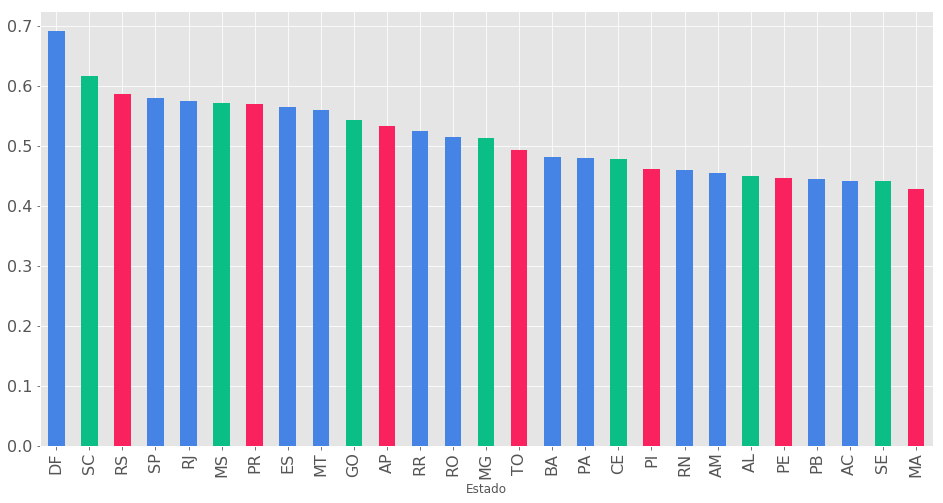

In [15]:
df_Ranking.groupby('Estado')['IGM - 2017'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(16,8), fontsize=16,
    color=[('#4583E5'), ('#0BBE86'),  ('#F9225E')]);

***
## Estados Com Maior Indice de Terceirizacao

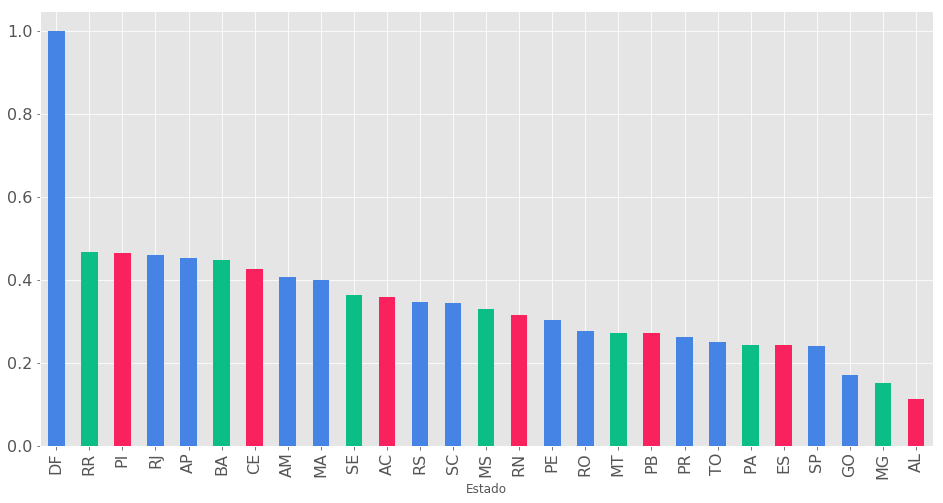

In [18]:
# Calculando a media dos estados com maior indice de terceirizacao

df_Ranking.groupby('Estado')['Terceirização - 2017'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(16,8), fontsize=16,
    color=[('#4583E5'), ('#0BBE86'),  ('#F9225E')]);

***
## Maiores PIB por Capital Brasileira

In [21]:
# Cortandoo DataFrame para as 10 cidades com MAIOR 'PIB 2013 - a preços correntes (1000 R$) (IBGE)'

df_Fiscal[df_Fiscal['Capital (1=Sim;0=Não)'] == 1].nlargest(10, 'PIB 2013 - a preços correntes (1000 R$) (IBGE)')

,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE Cidades),Densidade demográfica 2010 (hab/km²) (IBGE Cidades),PIB 2013 - a preços correntes (1000 R$) (IBGE),PIB 2013 - a preços correntes per capita (IBGE),Despesas com educação (STN 2016),Despesas com saúde (STN 2016),Gasto per capita educação 2016 (Despesas com educação 2016 (STN)/pop 2016 (IBGE)),Gasto per capita saúde 2016 (Despesas com saúde 2016 (STN)/pop. 2016 (IBGE)),Gastos per capita (índice),Receita Própria (IFGF 2017),Gastos com Pessoal (IFGF 2017),Investimentos (IFGF 2017),Liquidez (IFGF 2017),Custo da Dívida (IFGF 2017),IFGF (2017),IFGF (índice),Índice Fiscal 2017,Ranking sem outliers,Ranking Estadual,Municípios com índice (1=Sim; 0 Não),Status em Gastos e Finanças,Variável do outlier
0,3550308,35,50308,SP,SAO PAULO,1,Grande porte,12038175,1521.11,7398.3,570700000.0,48275.446,9.900947e+09,9.410424e+09,822.462423,781.715152,0.404143,1.000000,0.826335,0.353028,0.611292,0.417691,0.669666,0.682000,0.543072,468.0,88.0,1,Com dados,NaN
2,3304557,33,4557,RJ,RIO DE JANEIRO,1,Grande porte,6498837,1200.18,5265.8,282500000.0,43941.246,4.191863e+09,4.603532e+09,645.017480,708.362377,0.342009,1.000000,0.557477,0.909365,0.471073,0.719087,0.732940,0.751303,0.546656,432.0,7.0,1,Com dados,NaN
1,5300108,53,108,DF,BRASILIA,1,Grande porte,2977216,5780.00,444.7,175400000.0,62859.432,4.903888e+09,4.875415e+09,1647.138653,1637.575062,0.825909,1.000000,0.000000,0.140406,0.000000,0.884716,0.345063,0.345063,0.585486,225.0,1.0,1,Com dados,NaN
3,3106200,31,6200,MG,BELO HORIZONTE,1,Grande porte,2513451,331.40,7167.0,81426708.0,32844.409,1.359094e+09,2.620254e+09,540.728067,1042.492396,0.402923,1.000000,0.777159,0.226534,0.670127,0.460897,0.647699,0.657940,0.530431,574.0,32.0,1,Com dados,NaN
4,4106902,41,6902,PR,CURITIBA,1,Grande porte,1893997,435.04,4027.0,79383343.0,42934.376,1.295458e+09,1.504535e+09,683.981109,794.370310,0.373706,1.000000,0.653231,0.121937,0.487176,0.731889,0.582216,0.586217,0.479962,1115.0,138.0,1,Com dados,NaN
7,1302603,13,2603,AM,MANAUS,1,Grande porte,2094391,11401.09,158.1,64025434.0,32300.563,1.069891e+09,7.012114e+08,510.836181,334.804440,0.212870,0.815383,0.676033,1.000000,0.583645,0.732280,0.765117,0.786546,0.499708,877.0,3.0,1,Com dados,NaN
8,4314902,43,14902,RS,PORTO ALEGRE,1,Grande porte,1481019,496.68,2837.5,57379337.0,39091.641,9.163195e+08,1.478588e+09,618.708800,998.358593,0.410504,1.000000,0.566579,0.288794,0.530052,0.634971,0.600218,0.605934,0.508219,783.0,159.0,1,Com dados,NaN
6,2927408,29,27408,BA,SALVADOR,1,Grande porte,2938092,692.82,3859.4,52667933.0,18264.127,1.077885e+09,1.241627e+09,366.865738,422.596264,0.200503,1.000000,0.710775,0.282141,0.807295,0.799171,0.709964,0.726139,0.463321,1360.0,27.0,1,Com dados,NaN
5,2304400,23,4400,CE,FORTALEZA,1,Grande porte,2609716,314.93,7786.4,49745920.0,19494.397,1.124825e+09,1.690418e+09,431.014367,647.740326,0.274265,0.789591,0.619933,0.450661,0.903781,0.820165,0.703909,0.719506,0.496885,907.0,16.0,1,Com dados,NaN
11,2611606,26,11606,PE,RECIFE,1,Grande porte,1625583,218.44,7039.6,46445339.0,29037.175,7.252546e+08,9.229129e+08,446.150465,567.742715,0.257288,0.992010,0.540641,0.309966,0.481406,0.729329,0.595838,0.601137,0.429212,1945.0,17.0,1,Com dados,NaN


***
## Menores PIB por Capital Brasileira

In [23]:
# Cortandoo DataFrame para as 5 cidades com MENOR 'PIB 2013 - a preços correntes (1000 R$) (IBGE)'

df_Fiscal[df_Fiscal['Capital (1=Sim;0=Não)'] == 1].nsmallest(5, 'PIB 2013 - a preços correntes (1000 R$) (IBGE)')

,Cód Mun,Codigouf,Codigomunicipio,Estado,Nome,Capital (1=Sim;0=Não),Porte do Município,População 2016 (IBGE),Área da unidade territorial 2015 (km²) (IBGE Cidades),Densidade demográfica 2010 (hab/km²) (IBGE Cidades),PIB 2013 - a preços correntes (1000 R$) (IBGE),PIB 2013 - a preços correntes per capita (IBGE),Despesas com educação (STN 2016),Despesas com saúde (STN 2016),Gasto per capita educação 2016 (Despesas com educação 2016 (STN)/pop 2016 (IBGE)),Gasto per capita saúde 2016 (Despesas com saúde 2016 (STN)/pop. 2016 (IBGE)),Gastos per capita (índice),Receita Própria (IFGF 2017),Gastos com Pessoal (IFGF 2017),Investimentos (IFGF 2017),Liquidez (IFGF 2017),Custo da Dívida (IFGF 2017),IFGF (2017),IFGF (índice),Índice Fiscal 2017,Ranking sem outliers,Ranking Estadual,Municípios com índice (1=Sim; 0 Não),Status em Gastos e Finanças,Variável do outlier
70,1721000,17,21000,TO,PALMAS,1,Grande porte,279856,2218.94,102.9,5824406.4,22583.622,2.171094e+08,1.649733e+08,775.789626,589.493613,0.343137,0.619471,0.531867,0.340721,0.710611,0.789752,0.574576,0.577849,0.460493,1402.0,40.0,1,Com dados,NaN
72,1400100,14,100,RR,BOA VISTA,1,Grande porte,326419,5687.04,50.0,6693993.0,21663.688,2.074893e+08,1.653224e+08,635.653404,506.472947,0.287587,0.242847,0.568593,1.000000,0.910725,0.825282,0.695015,0.709765,0.498676,889.0,1.0,1,Com dados,NaN
127,1200401,12,401,AC,RIO BRANCO,1,Grande porte,377057,8835.52,38.0,6767742.6,18946.966,1.406218e+08,1.073079e+08,372.945697,284.593265,0.166341,0.567424,0.661920,0.512713,1.000000,0.683887,0.685352,0.699180,0.432760,1887.0,2.0,1,Com dados,NaN
90,1600303,16,303,AP,MACAPA,1,Grande porte,465495,6502.11,62.1,8247833.2,18862.710,1.865521e+08,1.222146e+08,400.760640,262.547689,0.167417,0.322269,0.000000,0.369100,1.000000,0.963524,0.476911,0.470877,0.319147,3806.0,2.0,1,Com dados,NaN
53,1100205,11,205,RO,PORTO VELHO,1,Grande porte,511219,34090.93,12.6,11464619.0,23638.780,2.770714e+08,2.881970e+08,541.981752,563.744761,0.279580,0.711434,0.577059,0.129955,0.777560,0.866426,0.580744,0.584605,0.432092,1894.0,25.0,1,Com dados,NaN
